[Canvas Link](https://smu.instructure.com/courses/119111/assignments/945173) \
[Data Source](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download)
##### Authors
- 1

### Exceptional Work

#### Additional analysis

UMAP is one of dimension deduction methods. Compare to other techniques such as t-SNE, UMAP offers a number of advantages. Firstly, it's fast. On MINST dataset, UMAP can project the data less than 3 minutes, while t-SNE can take up to 45 minutes. Secondly, UMAP better preserve global structure of the data. This due to UMAP's strong theoretical foundations. Lastly, UMAP offers more understandable parameters that make it a more effective tool for visualizing high dimensional data.

UMAP starts by constructing a graph that captures relationships between data points. It then optimizes a low-dimensional representation that preserves these relationships, ensuring that nearby points in the high-dimensional space remain close in the reduced space. UMAP strikes a balance between preserving local structure, representing fine details, and maintaining global structure, capturing broader patterns.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
import umap.plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings 
warnings.filterwarnings("ignore")

(5110, 12)
(4909, 12)


Text(0.5, 0.92, 'Supervised UMAP Projection of the Stroke Data')

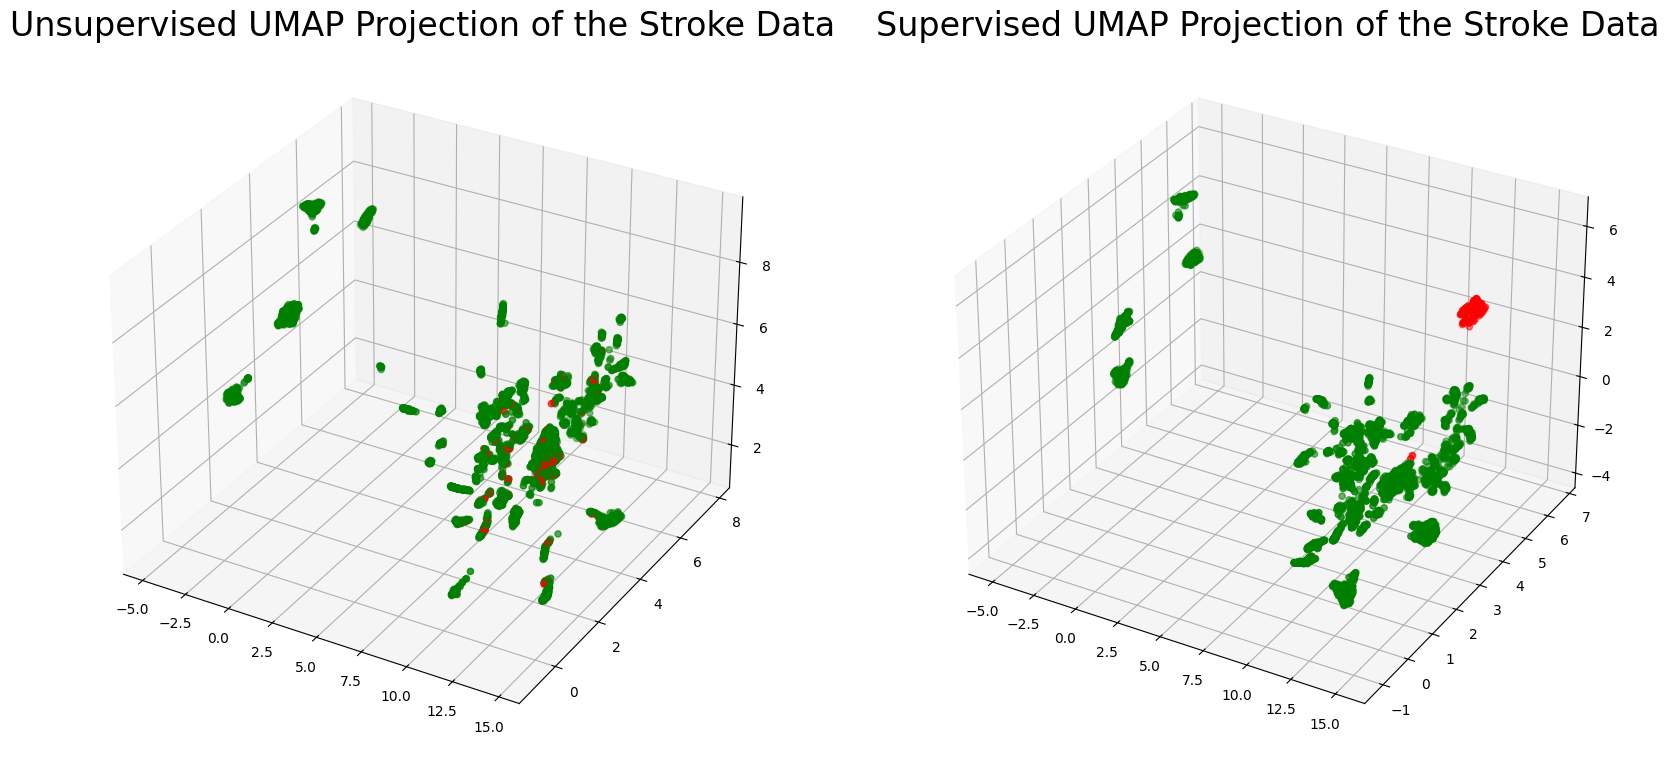

In [16]:
df = pd.read_csv("data\healthcare-dataset-stroke-data.csv")

# preprocess
print(df.shape)
df = df.dropna()
print(df.shape)
labels = df['stroke']
data = df.drop(['id', 'stroke'], axis=1)

# encoded categorical data
data_encoded = pd.get_dummies(data, columns=["gender","ever_married", "work_type", "Residence_type", "smoking_status"])

# scale
data_scaled = StandardScaler().fit_transform(data_encoded)

# UMAP dimension deduction
data_umap_unsupervised = umap.UMAP(n_components=3, n_neighbors=500).fit_transform(data_scaled)
data_umap_supervised = umap.UMAP(n_components=3, n_neighbors=500).fit_transform(data_scaled,  y = labels)

# plot the results
plot_colors = labels.map(lambda x: 'red' if x == 1 else 'green')

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(
    data_umap_unsupervised[:, 0],
    data_umap_unsupervised[:, 1],
    data_umap_unsupervised[:, 2],
    c=plot_colors)
plt.title('Unsupervised UMAP Projection of the Stroke Data', fontsize=24)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(
    data_umap_supervised[:, 0],
    data_umap_supervised[:, 1],
    data_umap_supervised[:, 2],
    c=plot_colors)
plt.title('Supervised UMAP Projection of the Stroke Data', fontsize=24)